## Tabel of Contents:
* [1 Case 1. Heart Disease Classification](#case-1)
* [2 Background](#case-background)
* [3 Data](#loading-data)
* [4 Data Exploratory Analysis](#exploratory-analysis)
* [5 Models and Training](#models-trainning)
* [6 Result and Discussion](#result-discussion)
* [7 Conclusions](#cas-conclusion)

# Case 1. Heart Disease Classification <a class="anchor" id="case-1"></a>
Team 14:<br>
* Awet Ghebreslassie
* Leevi Pelkonen
* Visa Soininen<br><br>
Last edited: 02.02.2020<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# 2 Background  <a class="anchor" id="case-background"></a>

The aim of this Notebook is to predict the probability of heart disease occurrence using data mining techniques and machine learning algorithms.
In this case we have used data sets that was collected by Cleveland Clinic Foundation in Switzerland.

# 3 Data  <a class="anchor" id="loading-data"></a>

The data is from UCI and can be found here [link](http://archive.ics.uci.edu/ml/datasets/Heart+Disease). The database contains 303 instances and 76 attributes, but in this case study only 14 attributes are used.<br>
Attribute Information:

| Attribute | Details |
| :----------|:-------|
|age | age in years |
|sex | sex(1 = male; 0 = female) |
|cp | chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) |
|trestbps | resting blood pressure (in mm Hg on admission to the hospital) |
|chol | serum cholestoral in mg/dl |
|fbs | fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
|restecg | resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy |
|thalach | maximum heart rate  |
|exang | exercise induced angina (1 = yes; 0 = no) |
|oldpeak | ST depression induced by exercise relative to rest |
|slope | the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) |
|ca | number of major vessels (0-3) colored by  |
|thal | 3 = normal; 6 = fixed defect; 7 = reversable  |
|num | the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing |

In [16]:
# imports
%pylab inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
file_url = 'Data/processed.cleveland.data'
# file_url = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data = pd.read_csv(file_url, index_col=None, na_values = '?', names=col_names)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


# 4 Exploratory Analysis <a class="anchor" id="exploratory-analysis"></a>

#### 4.1 Descriptive statistics and summary

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#### 4.2 Investigating missing attribute values

In [4]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


We can see that there are 6 missing values occuring only on two attributes namely number of major vessels and thal. The missing values are also found on 6 distince instances or rows.

#### 4.3 Correlation matrix and heatmap

AxesSubplot(0.125,0.125;0.62x0.755)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.222853
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.224469
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.407075
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.157754
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.070909
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.059186
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.183696
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.415040
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.397057
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.504092


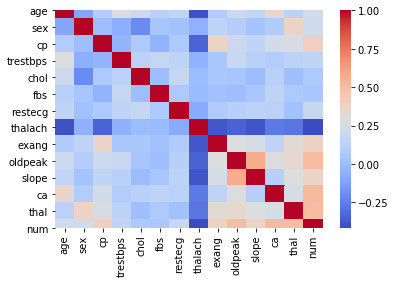

In [5]:
corr = data.corr()
print(sns.heatmap(corr, cmap='coolwarm'))
corr.style.background_gradient(cmap='coolwarm', axis=None)

#### 4.4 Visulazing the distibution of the data for all attributes

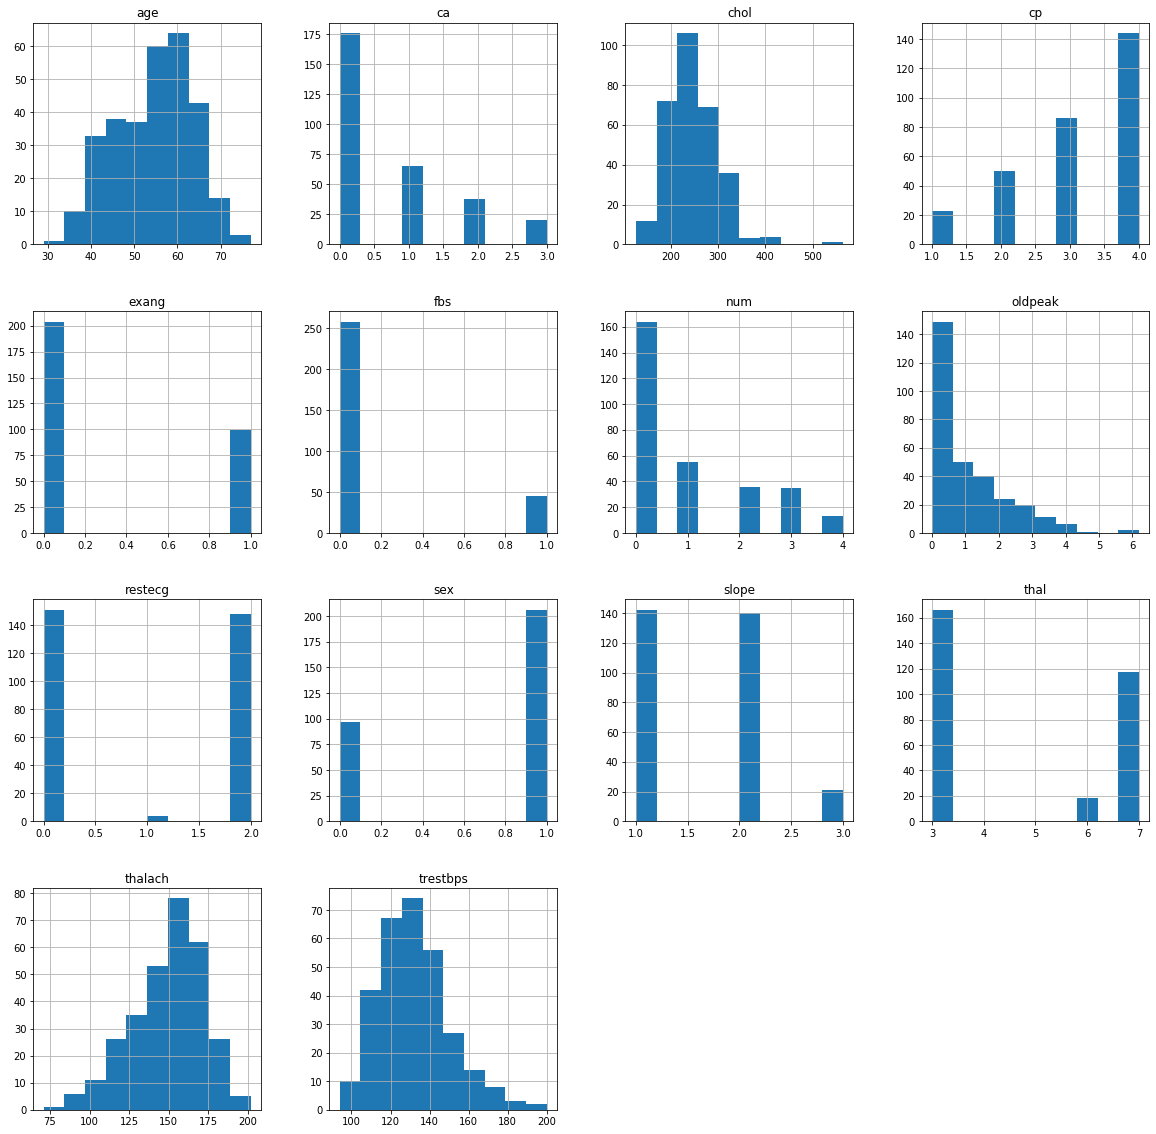

In [6]:
data.hist(figsize=(20, 20));

We can see that all attributes have different types of distibution, and we need to scale our data if our models depends on uniform distribution across attributes.

# 5 Models and training  <a class="anchor" id="models-trainning"></a>

We have used Random Forrest Classifier, KNeighborsClassifier, DecisionTreeClassifier and Keras Sequential model to predict the occurance of heart disease on a person using the given dataset.

In [20]:
# data preprocessing for random forest clasifer

data_rfc = data.dropna()

# Convert categorical attributes into dummy/indicator variables
data_rfc = pd.get_dummies(data_rfc, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# scale non categorical attributes
standardScaler = preprocessing.StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_rfc[columns_to_scale] = standardScaler.fit_transform(data_rfc[columns_to_scale])

# split data
samples= data_rfc.iloc[:,0:13].to_numpy()

# simplifying the target column to 1 or 0 meaning a perosn have disease or not
labels = 1.0 * (data_rfc.iloc[:, 13] > 0).to_numpy()

# splitting data with random state set to 42 for reproducing same result on rerunnig model
train_samples,test_samples,train_labels,test_labels = train_test_split(samples, labels, test_size=0.3,random_state=42)

#### 5.1 Random Forrest Classifier

In [19]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(train_samples, train_labels)
predicted_labels = rf_classifier.predict(test_samples)
print(metrics.classification_report(test_labels, predicted_labels))
print(metrics.confusion_matrix(test_labels, predicted_labels).T)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

[[80  0]
 [ 0 10]]


Using the Random Forrest Classifier we are able to achieve 100 percent accuracy. we have droped the NAN values since imputing them didn't change the result. The target column values are simplified to 1 or 0 meaning the person either have the disease or not. We have conver categorical attribues into dummy variables and we have scaled no categorical attribues using StandardScaler. We have used 70 percent of the data for trainning and 30% percent for testing in this case. We have also set keras random state to 42 for reproducing results on re-runs.

#### 5.2 KNeighborsClassifier

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(train_samples, train_labels)
predicted_labels = classifier.predict(test_samples)
print(metrics.classification_report(test_labels, predicted_labels))
print(metrics.confusion_matrix(test_labels, predicted_labels).T)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

[[80  0]
 [ 0 10]]


#### 5.3 DecisionTreeClassifier

In [22]:
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(train_samples, train_labels)
predicted_labels = dt_classifier.predict(test_samples)
print('Accuracy score:',metrics.accuracy_score(test_labels, predicted_labels))
print(metrics.classification_report(test_labels, predicted_labels))
print(metrics.confusion_matrix(test_labels, predicted_labels).T)

Accuracy score: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        10

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

[[80  0]
 [ 0 10]]


#### 5.x Keras Sequential model or linear stack of layers

In [9]:
model = Sequential()
model.add(Dense(13, activation='relu', input_shape=(13,))),
model.add(Dense(26, activation='relu')),
model.add(Dense(1, activation='sigmoid'))
model.summary()

partial_train_samples,val_samples,partial_train_labels,val_labels = train_test_split(train_samples, train_labels, test_size=0.2,random_state=42)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(partial_train_samples, 
                    partial_train_labels, 
                    validation_data = (val_samples, val_labels), 
                    batch_size=10, epochs=60, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 26)                364       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 27        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________


In [10]:
test_loss, test_acc = model.evaluate(test_samples, test_labels, verbose=0)
print('Test accuracy:' + str(test_acc))

Test accuracy:1.0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


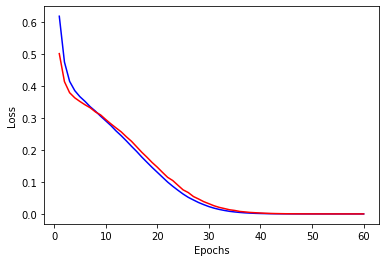

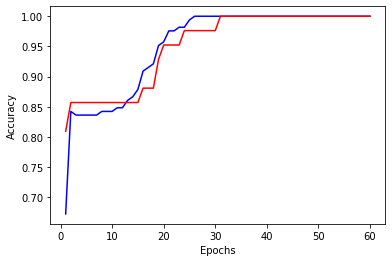

In [11]:
print(history.history.keys())
loss = history.history['loss']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'b-')
plt.plot(epochs, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(epochs, accuracy, 'b-')
plt.plot(epochs, val_accuracy, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

We have used all data processing and data spliting from previous model(Random Forrest Classifier) as they are in this model and we are able to achieve 100 percent accuracy with Keras Sequential model as well. We have use 30 percent of the data for testing, 20 percent for validation and 50 precent for trainning.

# 6 Results and Discussion  <a class="anchor" id="result-discussion"></a>

The following results were achieved ...

In [12]:
# Maybe some graphics?

# 7 Conclusions  <a class="anchor" id="cas-conclusion"></a>

To summarize we found out that ...